In [1]:
from __future__ import print_function 
import time
import numpy as np 
import seaborn as sns
from numpy import reshape 
import pandas as pd
from sklearn.datasets import fetch_openml 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0 
y = mnist.target
print(X.shape , y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


In [3]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ] 
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

Size of the dataframe: (70000, 786)


<Figure size 640x480 with 0 Axes>

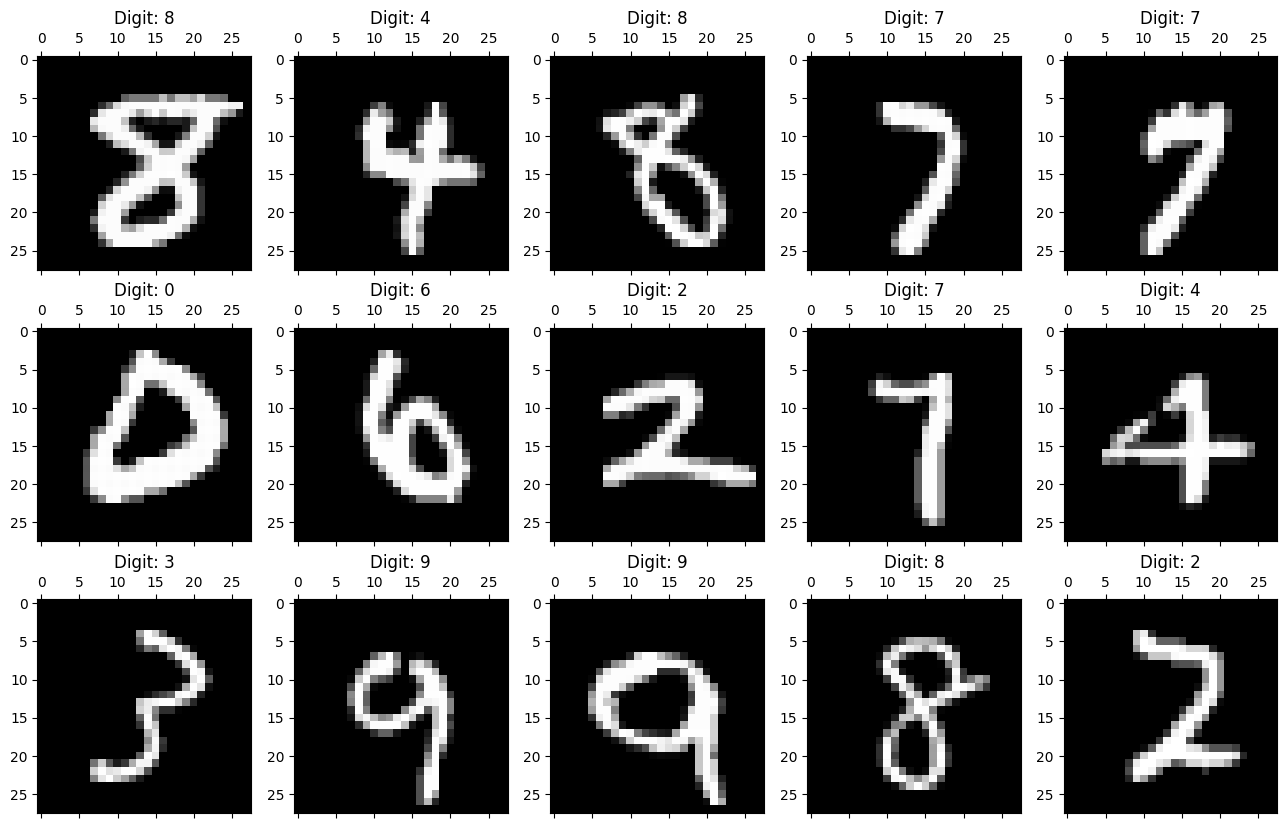

In [26]:
plt.gray()
fig = plt.figure( figsize=(16,10) ) 
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float)) 
plt.show()

In [5]:
df[feat_cols].values

array([[nan,  0.,  0., ...,  0.,  0.,  0.],
       [nan,  0.,  0., ...,  0.,  0.,  0.],
       [nan,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan,  0.,  0., ...,  0.,  0.,  0.],
       [nan,  0.,  0., ...,  0.,  0.,  0.],
       [nan,  0.,  0., ...,  0.,  0.,  0.]])

In [6]:
df['pixel0'] = df['pixel0'].fillna(0)

In [7]:
df[feat_cols].values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca. explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


<Axes: xlabel='pca-one', ylabel='pca-two'>

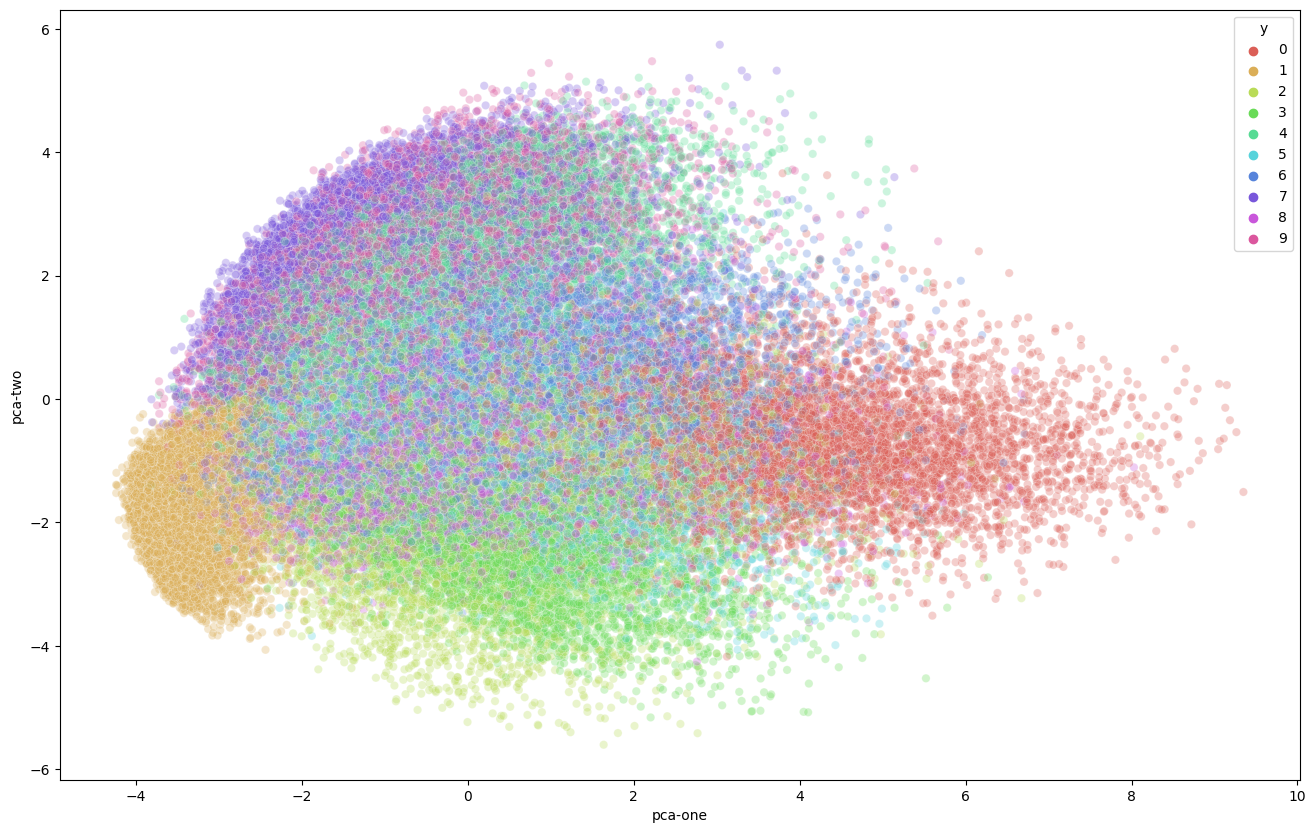

In [9]:
plt.figure(figsize=(16,10)) 
sns.scatterplot(
    x="pca-one", y="pca-two", 
    hue="y",
    palette=sns.color_palette("hls", 10), 
    data=df.loc[rndperm ,:],
    legend="full", 
    alpha =0.3
)

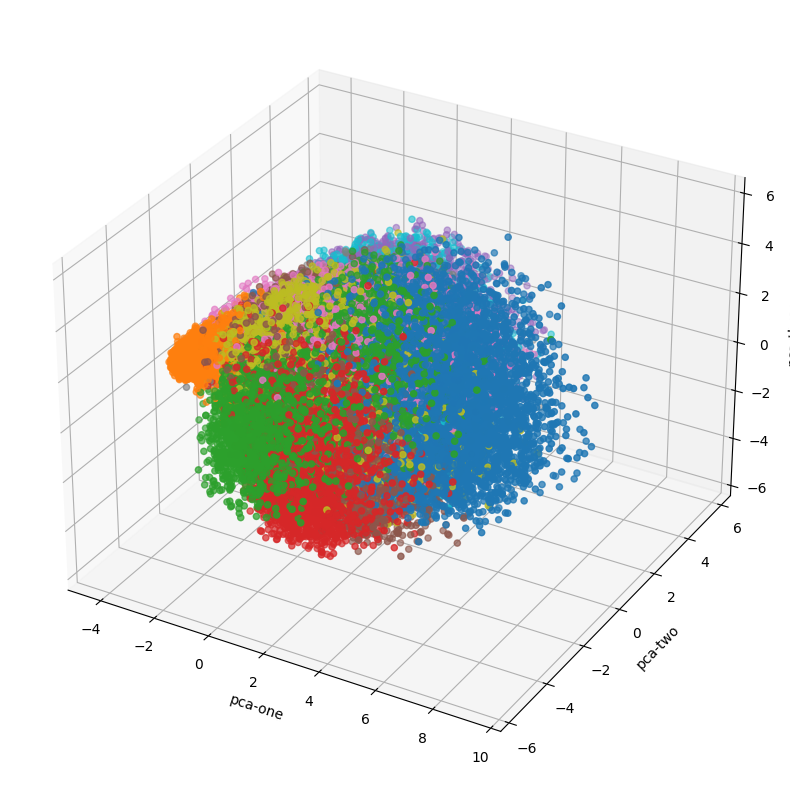

In [10]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(
    xs=df.loc[rndperm ,:]["pca-one"], 
    ys=df.loc[rndperm ,:]["pca-two"],
    zs=df.loc[rndperm ,:]["pca-three"], 
    c=df.loc[rndperm ,:]["y"].astype(float),
    cmap='tab10' 
)
ax.set_xlabel('pca-one') 
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three') 
plt.show()

In [11]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy() 
data_subset = df_subset[feat_cols].values

In [12]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset) 
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca. explained_variance_ratio_))
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300) 
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Explained variation per principal component: [0.09819946 0.07123677 0.06113222]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.031s...
[t-SNE] Computed neighbors for 10000 samples in 7.527s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.117974
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.84915

In [14]:
df_subset['tsne-2d-one'] = tsne_results[:,0] 
df_subset['tsne-2d-two'] = tsne_results[:,1]

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

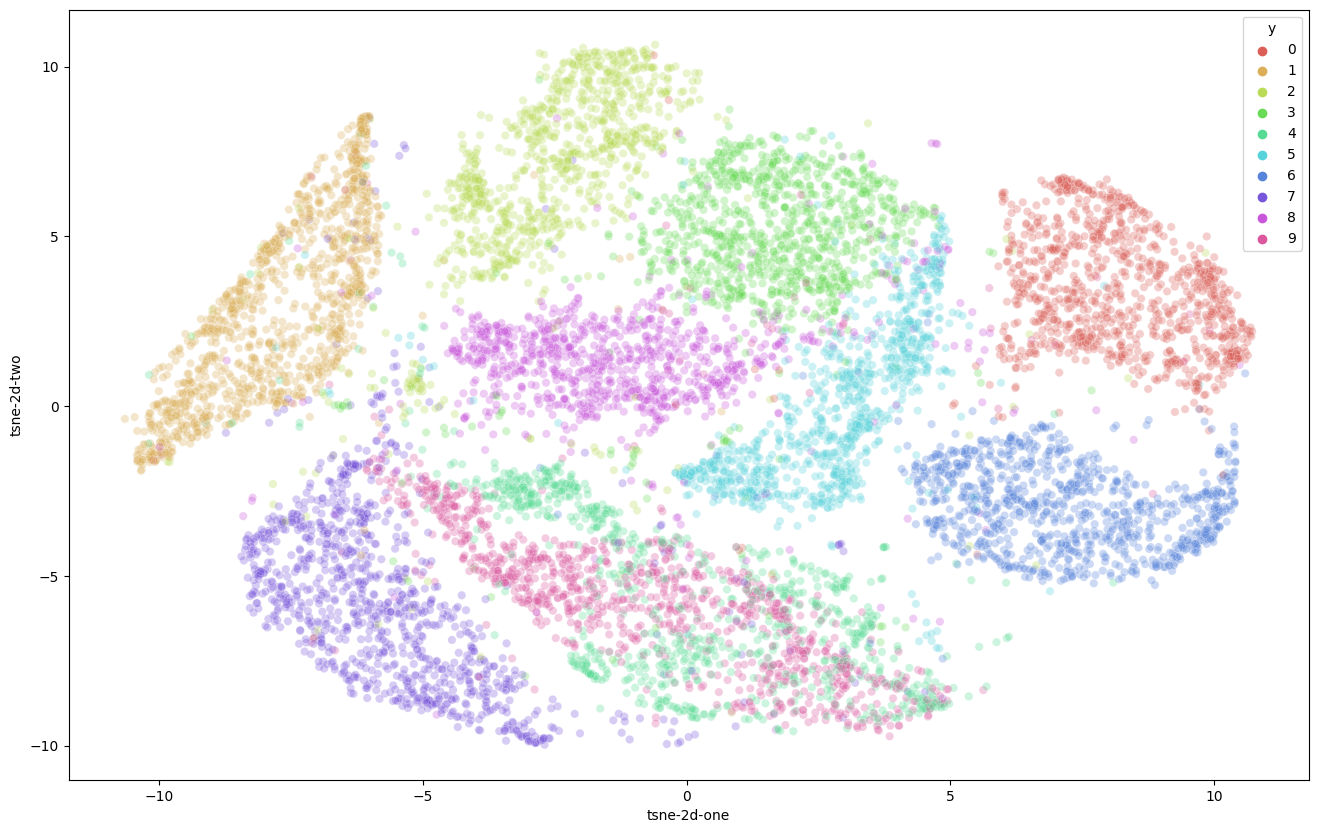

In [15]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y", 
    palette=sns.color_palette("hls", 10),
    data=df_subset , 
    legend="full",
    alpha =0.3 
)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

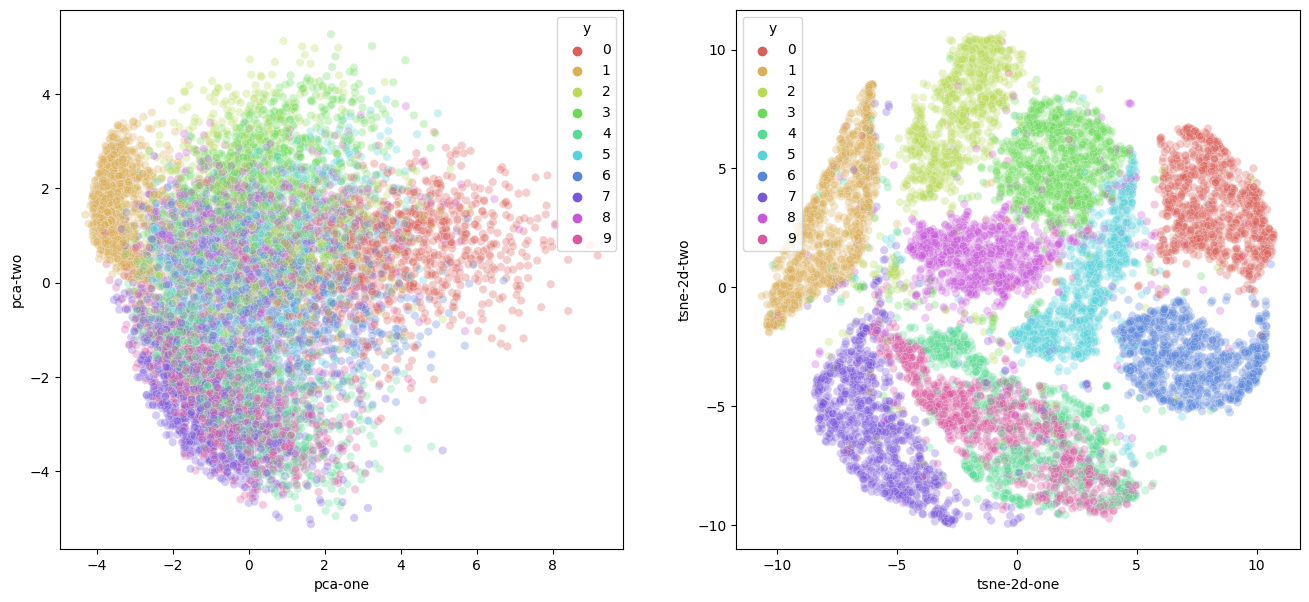

In [16]:
plt.figure(figsize=(16,7)) 
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y", 
    palette=sns.color_palette("hls", 10),
    data=df_subset , 
    legend="full",
    alpha =0.3 , 
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y", 
    palette=sns.color_palette("hls", 10),
    data=df_subset , 
    legend="full",
    alpha =0.3 , 
    ax=ax2
)